In [1]:
import math
import matplotlib
import numpy as np
import sklearn

matplotlib.__version__,np.__version__,sklearn.__version__

('3.0.3', '1.16.3', '0.21.1')

In [4]:
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [5]:
np.random.seed(222)
X, y = make_classification(
    n_samples=10000, 
    n_features=10,
    n_informative=10,
    n_redundant=0,
    weights=[0.3,0.7],
    flip_y=0.35) # the default value for flip_y is 0.01, or 1%
X_train, _ , y_train, _ = train_test_split(X, y, test_size=0.25)

In [6]:
X.mean(),y.mean()

(-0.1693361746399257, 0.6342)

In [7]:
np.random.seed(222)
X, y = make_classification(
    n_samples=10000, 
    n_features=10,
    n_informative=10,
    n_redundant=0,
    weights=[0.3,0.7],
    flip_y=0.0)
_, X_test , _ , y_test = train_test_split(X, y, test_size=0.25)

In [8]:
X.mean(),y.mean()

(-0.16933617463992567, 0.7)

In [9]:
pipeline = Pipeline([
    ('prep',MinMaxScaler()),
    ('clf',SVC())
])

In [10]:
param_grid = [
    {
        'clf__kernel': ['linear','poly','rbf'],
        'clf__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'clf__gamma':['auto']
    }
]

<Figure size 432x288 with 0 Axes>

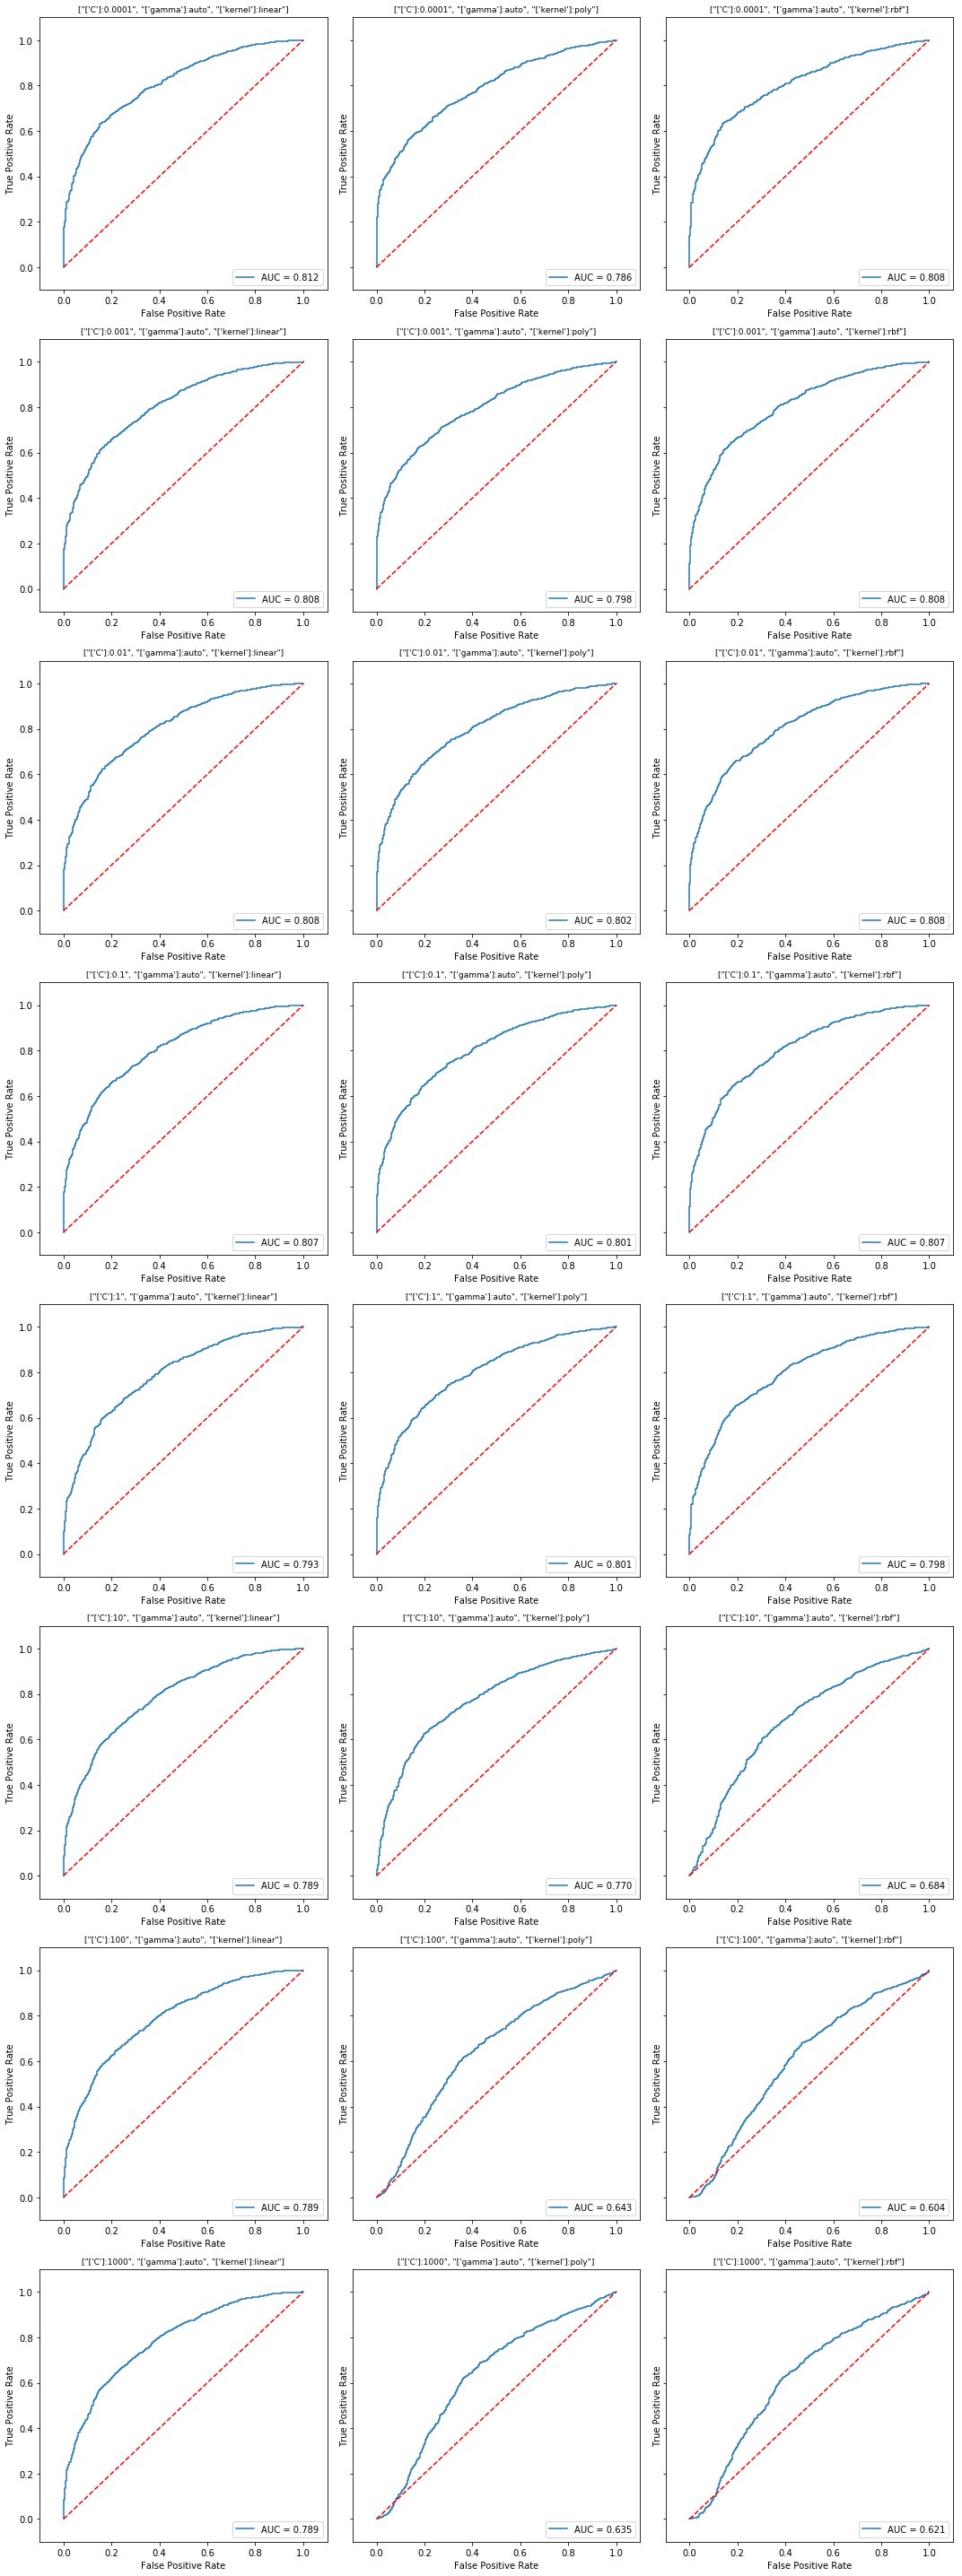

In [11]:
num_cols = 3
num_rows = math.ceil(len(ParameterGrid(param_grid)) / num_cols)

# create a single figure
plt.clf()
fig,axes = plt.subplots(num_rows,num_cols,sharey=True)
fig.set_size_inches(num_cols*5,num_rows*5)

for i,g in enumerate(ParameterGrid(param_grid)):

    pipeline.set_params(**g)
    pipeline.fit(X_train,y_train)

    y_preds = pipeline.decision_function(X_test)
    
    # fpr means false-positive-rate
    # tpr means true-positive-rate
    fpr, tpr, _ = metrics.roc_curve(y_test, y_preds)

    auc_score = metrics.auc(fpr, tpr)

    ax = axes[i // num_cols, i % num_cols]

    # don't print the whole name or it won't fit
    ax.set_title(str([r"{}:{}".format(k.split('__')[1:],v) for k,v in g.items()]),fontsize=9)
    ax.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
    ax.legend(loc='lower right')

    # it's helpful to add a diagonal to indicate where chance 
    # scores lie (i.e. just flipping a coin)
    ax.plot([0,1],[0,1],'r--')

    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([-0.1,1.1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')

plt.gcf().tight_layout()
plt.show()